# WILLIAM MOLLERS HOUSING REGRESSION: Mid-Bootcamp Project 

# 1. Importing tools and data

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)


import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import BASE_COLORS

#importing the tools I will need 
#other things to potentially add as per the this article:
#https://www.kaggle.com/ekami66/detailed-exploratory-data-analysis-with-python 

In [2]:
# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

#saw this might be good. Let's see

In [3]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")


In [4]:
df = pd.read_csv('data_mid_bootcamp_project_regression/regression_data_clean2.csv')

# 2. Taking a look at the data and provisonally cleaning it up

### GOALS: 
##### Check Shape, Info, Uniques, etc
##### To remove duplicates
##### To ensure all column names are in the correct format
##### Check for typing errors(extreme outliers) and deal with them
##### Remove Columns that are not necessary for the model at all (e.g. date)


### Technique
##### I will examine the data and also clean minor issues. 

In [5]:
df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,10/13/14,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/14,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2/23/15,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,6/23/14,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,1/16/15,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [6]:
df.shape

(21597, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

All columns were imported successfully and all column names are already lowercase and with _ where necessary. No need to change anything there. 

We can also see that the date column is an object, let's convert this to datetime, as it may be relevant for
further cleaning. 

# Changing the date to datetime. 

In [8]:
df['date'] = pd.to_datetime(df['date'])


In [9]:
df.info()
#seems to have worked. Fantastic!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

# Checking for uniques, to see where we might have duplicates

In [10]:
df.nunique()

id               21420
date               372
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
price             3622
dtype: int64

### We do indeed have some duplicates, 177 of them, which we can see by the id column. 

### We can also see that we have 4 columns that are very similar: sqft_living, sqft_lot, sqft_living15, sqft_lot15. 
I assume that the 15s are newer data and I will drop the older data in the next step. 

### For now, however, let us make sure about the duplicate values 

In [11]:
df = df.sort_values(by=['id', 'date'])

In [12]:
df


,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
2494,1000102,2014-09-16,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316,280000
2495,1000102,2015-04-22,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316,300000
6729,1200019,2014-05-08,4,1.75,2060,26036,1.0,0,0,4,8,1160,900,1947,0,98166,47.4444,-122.351,2590,21891,647500
8404,1200021,2014-08-11,3,1.00,1460,43000,1.0,0,0,3,7,1460,0,1952,0,98166,47.4434,-122.347,2250,20023,400000
8800,2800031,2015-04-01,3,1.00,1430,7599,1.5,0,0,4,6,1010,420,1930,0,98168,47.4783,-122.265,1290,10320,235000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16723,9842300095,2014-07-25,5,2.00,1600,4168,1.5,0,0,3,7,1600,0,1927,0,98126,47.5297,-122.381,1190,4168,365000
3257,9842300485,2015-03-11,2,1.00,1040,7372,1.0,0,0,5,7,840,200,1939,0,98126,47.5285,-122.378,1930,5150,380000
7614,9842300540,2014-06-24,3,1.00,1100,4128,1.0,0,0,4,7,720,380,1942,0,98126,47.5296,-122.379,1510,4538,339000
20963,9895000040,2014-07-03,2,1.75,1410,1005,1.5,0,0,3,9,900,510,2011,0,98027,47.5446,-122.018,1440,1188,399900


Seems as if the date is chronological and the first id is already duplicated, but with later dates, i.e. the property was sold twice. 
I have decided to only keep the most recent sale date, as for my later processing in Tableau, this may lead to issues if I have the same id twice and it is also good practice in general (I think ;) )

In [13]:
df.duplicated(subset = 'id', keep = 'last')
#here we can see the older record gets sorted out. Perfect!

2494      True
2495     False
6729     False
8404     False
8800     False
         ...  
16723    False
3257     False
7614     False
20963    False
15937    False
Length: 21597, dtype: bool

In [14]:
df.drop_duplicates(subset = 'id', keep =  'last', inplace = True)

In [15]:
df
#the drop has worked(21420 instead of 21597 records) and I wanted to modify the DF, hence inplace = True. 

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
2495,1000102,2015-04-22,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316,300000
6729,1200019,2014-05-08,4,1.75,2060,26036,1.0,0,0,4,8,1160,900,1947,0,98166,47.4444,-122.351,2590,21891,647500
8404,1200021,2014-08-11,3,1.00,1460,43000,1.0,0,0,3,7,1460,0,1952,0,98166,47.4434,-122.347,2250,20023,400000
8800,2800031,2015-04-01,3,1.00,1430,7599,1.5,0,0,4,6,1010,420,1930,0,98168,47.4783,-122.265,1290,10320,235000
3553,3600057,2015-03-19,4,2.00,1650,3504,1.0,0,0,3,7,760,890,1951,2013,98144,47.5803,-122.294,1480,3504,402500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16723,9842300095,2014-07-25,5,2.00,1600,4168,1.5,0,0,3,7,1600,0,1927,0,98126,47.5297,-122.381,1190,4168,365000
3257,9842300485,2015-03-11,2,1.00,1040,7372,1.0,0,0,5,7,840,200,1939,0,98126,47.5285,-122.378,1930,5150,380000
7614,9842300540,2014-06-24,3,1.00,1100,4128,1.0,0,0,4,7,720,380,1942,0,98126,47.5296,-122.379,1510,4538,339000
20963,9895000040,2014-07-03,2,1.75,1410,1005,1.5,0,0,3,9,900,510,2011,0,98027,47.5446,-122.018,1440,1188,399900


I can take another id that was duplicated (I know this from my prior exploration in Excel) and check if there are 2 left or not... 

In [16]:
df[df['id'] == 726049190]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
824,726049190,2015-02-18,3,1.0,1810,7200,1.0,0,0,4,7,1130,680,1954,0,98133,47.7493,-122.351,1810,8100,431000


The older date was indeed removed and of course I cannot be 100% sure that this was correct for all 177 records unless I go through the data by hand, but considering the date sorting, I would say that it is very likely to be okay. 

# Now I  check for NaN values per column


In [17]:
#Check NaN values total

df.isna().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [18]:
# Check NaNs (Percentage)
df.isna().sum()/len(df)

id               0.0
date             0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
grade            0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
zipcode          0.0
lat              0.0
long             0.0
sqft_living15    0.0
sqft_lot15       0.0
price            0.0
dtype: float64

In [19]:
df.dropna(inplace = True)

In [20]:
df.shape

(21420, 21)

In [21]:
df.describe()


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.00000,21420.000000,21420.000000,21420.000000,21420.000000,2.142000e+04
mean,4.580940e+09,3.373950,2.118429,2083.132633,1.512804e+04,1.495985,0.007610,0.235107,3.410784,7.662792,1791.170215,291.962418,1971.092997,84.793091,98077.87437,47.560197,-122.213784,1988.384080,12775.718161,5.418614e+05
std,2.876761e+09,0.925405,0.768720,918.808412,4.153080e+04,0.540081,0.086903,0.767165,0.650035,1.171971,828.692965,442.875502,29.387141,402.574626,53.47748,0.138589,0.140791,685.537057,27345.621867,3.675569e+05
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.00000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.123537e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.00000,47.471200,-122.328000,1490.000000,5100.000000,3.249500e+05
50%,3.904921e+09,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.00000,47.572100,-122.230000,1840.000000,7620.000000,4.505500e+05
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,560.000000,1997.000000,0.000000,98117.00000,47.678100,-122.125000,2370.000000,10086.250000,6.450000e+05
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.00000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


### Have we really got 0 NaNs? 

It appears so, as no rows were removed in our processing. 

Well we do have some zeros, but these are not NaNs, in fact they appear to act like Booleans, e.g. waterfront 0 = False and 1 = True and not like numeric values.
in total there are four columns which have zeros:

waterfront, view, sqft_basement & yr_renovated 

These could all be converted into ***Boolean*** categorical data types, but that will happen further down. 

We also have some ***Outliers*** that will be dealt with later (cf. bathrooms, bedrooms, grade) 


Now Let's plot all the columns so we can see what other weird things we might have

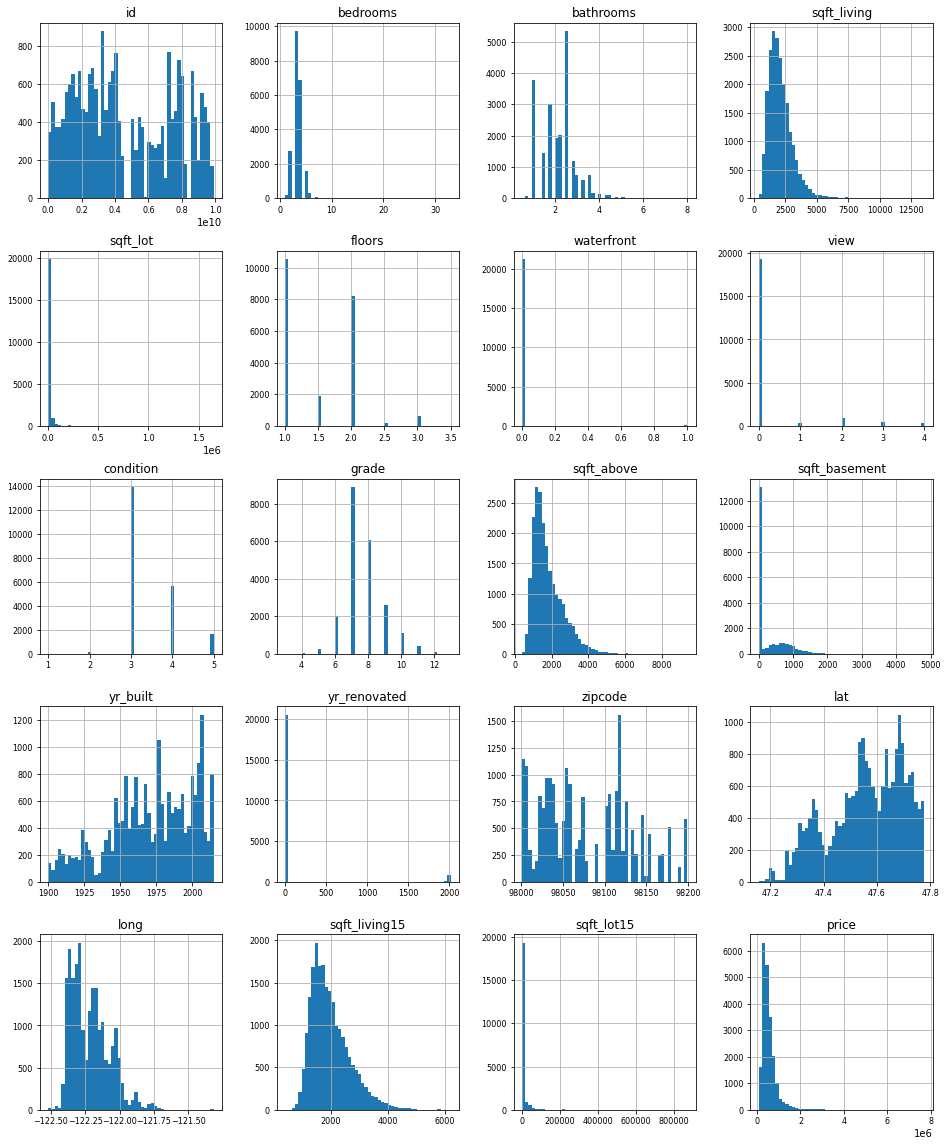

In [22]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

# SUMMARY AND TO-DO-LIST AFTER FIRST CHECK OF THE DATA

## Cleaning

***GENERAL***

- All columns are written without spaces and in lower case, so there is no need to change the names
- Date has been converted to a date format

***DROPPING***

- We can drop the column **date**, because it refers to the date of sale and all the dates are within a year of each other. This will not add any value. If, however, the sales were over 50 years, then this would be relevant because of inflation. 
- Furthermore sqft_living and sqft_lot can be dropped, since we'll keep the newest values found in sqft_living15 and sqft_lot15.
- Lat, Long and zipcode won't be needed for my analysis in python. 

***DATA TYPES***

- We can change multiple columns into a boolean format: 
waterfront = already boolean, perfect. 
sqft_basement, yr_renovated and view. 

- All features except from date were numerical, but the reality is that some of them are categorical:



## Wrangling

***OUTLIERS AND BUCKETING***

- Deal with **outliers** in bedrooms, bathrooms and floors

- Keep only one of condition and grade TBC

## Testing

- I will aim to do 2 Iterations of cleaning: 
1st: with minimal cleaning 
2nd: with 1.5*IQR as the basis for cleaning
3rd: with 

- Within each iteration I will do three separate tests
1. With all remaining columns
2. With only those that are at least 0.45 correlated to price
3. With only those that are at least 0.45 correlated to price and less than 0.75 correlated to each other. 

- Making sure that I create a separate test for properties that are valued at or above 650k 
Here I will do the same iterations as above, but then will also list some qualitative explanations. 

#### Dropping unnecessary Columns

In [23]:
df.drop(['id','date', 'sqft_living', 'sqft_lot', 'lat', 'long', 'zipcode'], axis=1, inplace=True)

#### Changing data types

In [24]:
df = df.astype({'sqft_basement': 'bool' ,'yr_renovated': 'bool', 'view': 'bool'})

In [25]:
df.head()

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price
2495,6,3.00,2.0,0,False,3,7,2400,False,1991,False,2060,7316,300000
6729,4,1.75,1.0,0,False,4,8,1160,True,1947,False,2590,21891,647500
8404,3,1.00,1.0,0,False,3,7,1460,False,1952,False,2250,20023,400000
8800,3,1.00,1.5,0,False,4,6,1010,True,1930,False,1290,10320,235000
3553,4,2.00,1.0,0,False,3,7,760,True,1951,True,1480,3504,402500


In [26]:
df = df.astype({'sqft_basement': 'int64' ,'yr_renovated': 'int64', 'view': 'int64'})

In [27]:
df.head()

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price
2495,6,3.00,2.0,0,0,3,7,2400,0,1991,0,2060,7316,300000
6729,4,1.75,1.0,0,0,4,8,1160,1,1947,0,2590,21891,647500
8404,3,1.00,1.0,0,0,3,7,1460,0,1952,0,2250,20023,400000
8800,3,1.00,1.5,0,0,4,6,1010,1,1930,0,1290,10320,235000
3553,4,2.00,1.0,0,0,3,7,760,1,1951,1,1480,3504,402500


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 2495 to 15937
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21420 non-null  int64  
 1   bathrooms      21420 non-null  float64
 2   floors         21420 non-null  float64
 3   waterfront     21420 non-null  int64  
 4   view           21420 non-null  int64  
 5   condition      21420 non-null  int64  
 6   grade          21420 non-null  int64  
 7   sqft_above     21420 non-null  int64  
 8   sqft_basement  21420 non-null  int64  
 9   yr_built       21420 non-null  int64  
 10  yr_renovated   21420 non-null  int64  
 11  sqft_living15  21420 non-null  int64  
 12  sqft_lot15     21420 non-null  int64  
 13  price          21420 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 2.5 MB


# Removing crazy outliers

#### Bedrooms 
I spotted an outlier in the bedrooms column from the describe that I did above. 

I checked in SQL to see what the other elements of the row are and compared to other properties of a similar size, this bedroom number would appear to be a typing error. Just from looking in SQL there should be between 3-4 bedrooms in that property. I think I will replace this 33 value with 3, assuming that the second 3 was a typing error.

The living space of the property is 150sqm, which cannot accommodate 33 bedrooms. That would be less than 5sqm per bedroom and not include a bathroom, kitchen or any other space. This seems 99% impossible. Not to mention that it's sale price, 640k was very similar to other properties of a similar size and rating level with 3-4 bedrooms.

Now let's replace that value. 

In [29]:
df['bedrooms'] = df['bedrooms'].replace([33],3)

In [30]:
df['bedrooms'].value_counts()
#And it is gone!

3     9732
4     6849
2     2736
5     1586
6      265
1      191
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

As we can see from the above two value counts, the 33 was indeed replaced successfully. 

### NB: more 'normal' cleaning will happen in the 2nd iteration of the model. 


# Correlation 


In [31]:
df.corr()


,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price
bedrooms,1.000000,0.528917,0.183570,-0.006976,0.082937,0.022743,0.367750,0.493566,0.163512,0.160365,0.018452,0.406240,0.031787,0.316910
bathrooms,0.528917,1.000000,0.501803,0.063734,0.177035,-0.129362,0.665587,0.686328,0.162598,0.506252,0.050431,0.569453,0.087760,0.525215
floors,0.183570,0.501803,1.000000,0.023530,0.015937,-0.266859,0.458091,0.522751,-0.257003,0.488935,0.005638,0.279071,-0.011367,0.254972
waterfront,-0.006976,0.063734,0.023530,1.000000,0.264628,0.016564,0.082955,0.072055,0.037306,-0.026529,0.093427,0.086602,0.030772,0.266995
view,0.082937,0.177035,0.015937,0.264628,1.000000,0.046621,0.236392,0.152514,0.194494,-0.064695,0.094831,0.272532,0.064839,0.358451
condition,0.022743,-0.129362,-0.266859,0.016564,0.046621,1.000000,-0.150508,-0.161483,0.135687,-0.365129,-0.060826,-0.095256,-0.003450,0.034219
grade,0.367750,0.665587,0.458091,0.082955,0.236392,-0.150508,1.000000,0.756221,0.049801,0.446235,0.013798,0.713178,0.120056,0.666835
sqft_above,0.493566,0.686328,0.522751,0.072055,0.152514,-0.161483,0.756221,1.000000,-0.212242,0.422977,0.022524,0.731887,0.194445,0.604424
sqft_basement,0.163512,0.162598,-0.257003,0.037306,0.194494,0.135687,0.049801,-0.212242,1.000000,-0.168879,0.048927,0.042617,-0.040553,0.180120
yr_built,0.160365,0.506252,0.488935,-0.026529,-0.064695,-0.365129,0.446235,0.422977,-0.168879,1.000000,-0.226053,0.324715,0.070125,0.051012


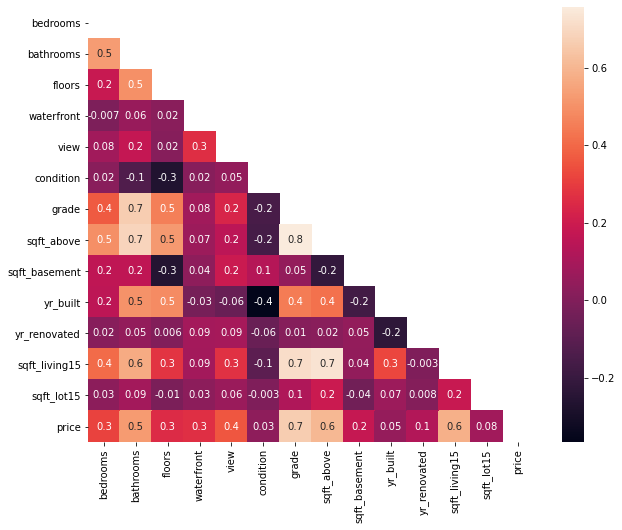

In [32]:
mask=np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)]=True
fig, ax=plt.subplots(figsize=(10, 8))
ax=sns.heatmap(df.corr(), mask=mask, annot=True, fmt='.1g')
plt.show()

We can see that grade affects the price the most.

Followed by sqft_above, sqft_living15 and bathrooms. 



# 1st ITERATION

The idea is to see how more cleaning / wrangling affects the models, so the first iteration is with 0 additional cleaning to the above. 

# ***ITERATION 1, TEST 1***: 
no more cleaning or removal, max columns. 

In [33]:
X=df.drop('price', axis=1)
y=df.price

In [34]:
X.dtypes

bedrooms           int64
bathrooms        float64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [35]:
X.head()

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
2495,6,3.00,2.0,0,0,3,7,2400,0,1991,0,2060,7316
6729,4,1.75,1.0,0,0,4,8,1160,1,1947,0,2590,21891
8404,3,1.00,1.0,0,0,3,7,1460,0,1952,0,2250,20023
8800,3,1.00,1.5,0,0,4,6,1010,1,1930,0,1290,10320
3553,4,2.00,1.0,0,0,3,7,760,1,1951,1,1480,3504


In [36]:
y.head()

2495    300000
6729    647500
8404    400000
8800    235000
3553    402500
Name: price, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test=tts(X, y, test_size=.25, random_state = 42)

In [38]:
import warnings
warnings.simplefilter('ignore')

import statsmodels.api as sm
from statsmodels.formula.api import ols

X_train_wi=sm.add_constant(X_train)
model=sm.OLS(y_train,X_train_wi).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     2248.
Date:                Thu, 19 Nov 2020   Prob (F-statistic):               0.00
Time:                        14:13:22   Log-Likelihood:            -2.2034e+05
No. Observations:               16065   AIC:                         4.407e+05
Df Residuals:                   16051   BIC:                         4.408e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.418e+06   1.64e+05     39.153

# LINEAR REGRESSION

In [39]:
from sklearn.linear_model import LinearRegression as LinReg

linreg=LinReg()    # model
linreg.fit(X_train, y_train)   # model train
y_pred_linreg=linreg.predict(X_test)

# R2

In [40]:
print ('train R2: {} -- test R2: {}'.format(linreg.score(X_train, y_train),
                                            linreg.score(X_test, y_test)))

train R2: 0.6454741333301519 -- test R2: 0.634613497786598


# MSE

In [41]:
from sklearn.metrics import mean_squared_error as mse


train_mse=mse(linreg.predict(X_train), y_train)
test_mse=mse(linreg.predict(X_test), y_test)

print ('train MSE: {} -- test MSE: {}'.format(train_mse, test_mse))

train MSE: 47927484168.759476 -- test MSE: 49254766631.1239


# OTHER MODELS

In [42]:
# sklearn
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split


In [43]:
def models_automation(models, X_train, y_train):
    for model in models:
        model.fit(X_train, y_train)
        print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

linear_models = [LinearRegression(), Lasso(), Ridge(), ElasticNet()]
models_automation(linear_models, X_train, y_train)

LinearRegression: Train -> 0.6454741333301519, Test -> 0.634613497786598
Lasso: Train -> 0.645474132017107, Test -> 0.6346190487262398
Ridge: Train -> 0.6454717073660009, Test -> 0.6348669069540724
ElasticNet: Train -> 0.5766785175895265, Test -> 0.5770011893001645


In [44]:
from sklearn.svm import SVR
svr = [SVR()]
models_automation(svr, X_train, y_train)

SVR: Train -> -0.06142758001696991, Test -> -0.06420132929645161


In [45]:
from sklearn.neighbors import KNeighborsRegressor
knn = [KNeighborsRegressor()]
models_automation(knn, X_train, y_train)

KNeighborsRegressor: Train -> 0.6501612552878211, Test -> 0.4408806610610121


In [46]:
from sklearn.tree import DecisionTreeRegressor
dtr = [DecisionTreeRegressor()]
models_automation(dtr, X_train, y_train)

DecisionTreeRegressor: Train -> 0.9999883194893056, Test -> 0.49069528215080693


In [47]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
rfr = [GradientBoostingRegressor(), RandomForestRegressor()]
models_automation(rfr, X_train, y_train)

GradientBoostingRegressor: Train -> 0.7968084512599024, Test -> 0.7316231097449333
RandomForestRegressor: Train -> 0.9638762053047565, Test -> 0.7310380983257794


# RESULTS ITERATION 1, TEST 1: 
63-64% prediction rate from linear regression. Pretty good!
All other types of analysis were worse except for the GradientBoostingRegressor and RandomForestRegresor 

# ***ITERATION 1, TEST 2***:  
Only those with a correlation of 0.45 or higher with price are kept. 

In [48]:
df1_2 = df.drop(['bedrooms','floors', 'waterfront', 'view', 'condition', 'sqft_basement', 'yr_built', 'yr_renovated', 
                 'sqft_lot15'], axis=1, inplace=False)

In [49]:
df1_2

,bathrooms,grade,sqft_above,sqft_living15,price
2495,3.00,7,2400,2060,300000
6729,1.75,8,1160,2590,647500
8404,1.00,7,1460,2250,400000
8800,1.00,6,1010,1290,235000
3553,2.00,7,760,1480,402500
...,...,...,...,...,...
16723,2.00,7,1600,1190,365000
3257,1.00,7,840,1930,380000
7614,1.00,7,720,1510,339000
20963,1.75,9,900,1440,399900


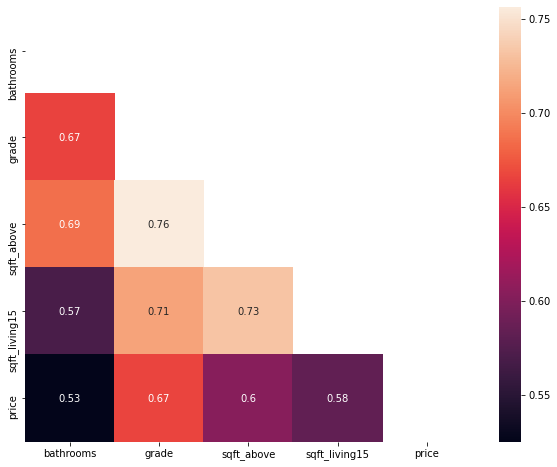

In [50]:
mask=np.zeros_like(df1_2.corr())
mask[np.triu_indices_from(mask)]=True
fig, ax=plt.subplots(figsize=(10, 8))
ax=sns.heatmap(df1_2.corr(), mask=mask, annot=True, fmt='.2g')
plt.show()

In [51]:
X=df1_2.drop('price', axis=1)
y=df1_2.price

In [52]:
X.head()

,bathrooms,grade,sqft_above,sqft_living15
2495,3.00,7,2400,2060
6729,1.75,8,1160,2590
8404,1.00,7,1460,2250
8800,1.00,6,1010,1290
3553,2.00,7,760,1480


In [53]:
y.head()

2495    300000
6729    647500
8404    400000
8800    235000
3553    402500
Name: price, dtype: int64

In [54]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test=tts(X, y, test_size=.25, random_state = 42)

In [55]:
import warnings
warnings.simplefilter('ignore')

import statsmodels.api as sm
from statsmodels.formula.api import ols

X_train_wi=sm.add_constant(X_train)
model=sm.OLS(y_train,X_train_wi).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     3699.
Date:                Thu, 19 Nov 2020   Prob (F-statistic):               0.00
Time:                        14:14:03   Log-Likelihood:            -2.2342e+05
No. Observations:               16065   AIC:                         4.469e+05
Df Residuals:                   16060   BIC:                         4.469e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -7.792e+05   1.67e+04    -46.791

In [56]:
from sklearn.linear_model import LinearRegression as LinReg

linreg=LinReg()    # model
linreg.fit(X_train, y_train)   # model train
y_pred_linreg=linreg.predict(X_test)

# R2

In [57]:
print ('train R2: {} -- test R2: {}'.format(linreg.score(X_train, y_train),
                                            linreg.score(X_test, y_test)))

train R2: 0.479514329513412 -- test R2: 0.4843065995868142


# MSE

In [58]:
from sklearn.metrics import mean_squared_error as mse


train_mse=mse(linreg.predict(X_train), y_train)
test_mse=mse(linreg.predict(X_test), y_test)

print ('train MSE: {} -- test MSE: {}'.format(train_mse, test_mse))

train MSE: 70363183839.39711 -- test MSE: 69516410531.57256


# OTHER MODELS 

In [59]:
# sklearn
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split


In [60]:
def models_automation(models, X_train, y_train):
    for model in models:
        model.fit(X_train, y_train)
        print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

linear_models = [LinearRegression(), Lasso(), Ridge(), ElasticNet()]
models_automation(linear_models, X_train, y_train)

LinearRegression: Train -> 0.479514329513412, Test -> 0.4843065995868142
Lasso: Train -> 0.4795143294830151, Test -> 0.4843064013958752
Ridge: Train -> 0.4795143285885455, Test -> 0.48430634133669814
ElasticNet: Train -> 0.46348704816109443, Test -> 0.4661720774704593


In [61]:
from sklearn.svm import SVR
svr = [SVR()]
models_automation(svr, X_train, y_train)

SVR: Train -> -0.05616652483145068, Test -> -0.058865134217069626


In [62]:
from sklearn.neighbors import KNeighborsRegressor
knn = [KNeighborsRegressor()]
models_automation(knn, X_train, y_train)

KNeighborsRegressor: Train -> 0.6042271563907047, Test -> 0.42998930014939185


In [63]:
from sklearn.tree import DecisionTreeRegressor
dtr = [DecisionTreeRegressor()]
models_automation(dtr, X_train, y_train)

DecisionTreeRegressor: Train -> 0.9934607822723929, Test -> 0.26213708955337733


In [64]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
rfr = [GradientBoostingRegressor(), RandomForestRegressor()]
models_automation(rfr, X_train, y_train)

GradientBoostingRegressor: Train -> 0.6528442423263516, Test -> 0.5931865820231634
RandomForestRegressor: Train -> 0.929463093512031, Test -> 0.5475064369398198


# RESULTS ITERATION 1, TEST 2: 
Removing some of the columns led to lower accuracy by about 0.15 in linear regression and more in other models. 
Further nuancing could be done here to find the exact ones, but time is an issue. 
The GradientBoostingRegressor and RandomForestRegressor were the only ones above 0.5 

# ***ITERATION 1, TEST 3***:  
Only those with a correlation of 0.45 or higher and have less than 0.75 with other columns are kept. 
This means that ALL columns except Grade will be removed. 

In [65]:
df1_3 = df1_2.drop(['bathrooms','sqft_above', 'sqft_living15'], axis=1, inplace=False)

In [66]:
df1_3

,grade,price
2495,7,300000
6729,8,647500
8404,7,400000
8800,6,235000
3553,7,402500
...,...,...
16723,7,365000
3257,7,380000
7614,7,339000
20963,9,399900


In [67]:
X=df1_3.drop('price', axis=1)
y=df1_3.price

In [68]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test=tts(X, y, test_size=.25, random_state = 42)

In [69]:
import warnings
warnings.simplefilter('ignore')

import statsmodels.api as sm
from statsmodels.formula.api import ols

X_train_wi=sm.add_constant(X_train)
model=sm.OLS(y_train,X_train_wi).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                 1.284e+04
Date:                Thu, 19 Nov 2020   Prob (F-statistic):               0.00
Time:                        14:14:31   Log-Likelihood:            -2.2395e+05
No. Observations:               16065   AIC:                         4.479e+05
Df Residuals:                   16063   BIC:                         4.479e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.06e+06   1.43e+04    -74.155      0.0

In [70]:
from sklearn.linear_model import LinearRegression as LinReg

linreg=LinReg()    # model
linreg.fit(X_train, y_train)   # model train
y_pred_linreg=linreg.predict(X_test)

# R2

In [71]:
print ('train R2: {} -- test R2: {}'.format(linreg.score(X_train, y_train),
                                            linreg.score(X_test, y_test)))

train R2: 0.444327363544038 -- test R2: 0.4456582629115996


# MSE

In [72]:
from sklearn.metrics import mean_squared_error as mse


train_mse=mse(linreg.predict(X_train), y_train)
test_mse=mse(linreg.predict(X_test), y_test)

print ('train MSE: {} -- test MSE: {}'.format(train_mse, test_mse))

train MSE: 75120023644.30287 -- test MSE: 74726276774.8171


# OTHER MODELS 

In [73]:
# sklearn
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split


In [74]:
def models_automation(models, X_train, y_train):
    for model in models:
        model.fit(X_train, y_train)
        print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

linear_models = [LinearRegression(), Lasso(), Ridge(), ElasticNet()]
models_automation(linear_models, X_train, y_train)

LinearRegression: Train -> 0.444327363544038, Test -> 0.4456582629115996
Lasso: Train -> 0.44432736353866253, Test -> 0.44565825063139575
Ridge: Train -> 0.44432736263497696, Test -> 0.44565810237917847
ElasticNet: Train -> 0.4127679881636346, Test -> 0.4133125837923137


In [75]:
from sklearn.svm import SVR
svr = [SVR()]
models_automation(svr, X_train, y_train)

SVR: Train -> -0.05460750766305278, Test -> -0.05733297415928207


In [76]:
from sklearn.neighbors import KNeighborsRegressor
knn = [KNeighborsRegressor()]
models_automation(knn, X_train, y_train)

KNeighborsRegressor: Train -> 0.27395818498780966, Test -> 0.3065024278762103


In [77]:
from sklearn.tree import DecisionTreeRegressor
dtr = [DecisionTreeRegressor()]
models_automation(dtr, X_train, y_train)

DecisionTreeRegressor: Train -> 0.5174115307191618, Test -> 0.5239908684484536


In [78]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
rfr = [GradientBoostingRegressor(), RandomForestRegressor()]
models_automation(rfr, X_train, y_train)

GradientBoostingRegressor: Train -> 0.5174115286143539, Test -> 0.523988822976615
RandomForestRegressor: Train -> 0.5173056374455557, Test -> 0.5247827418411857


# RESULTS ITERATION 1, TEST 3: 
Considering that we are only working with 1 column, I would say that the results are not too bad (43-44% in Linear regression), particularly when compared to the few more columns used above in Test 2. Again, the GradientBoostingRegressor and RandomForestRegressor were the only ones above 0.5 

# 2nd Iteration
My Goal here will be to do some more cleaning, namely to remove outliers via the 1.5*IQR method and then to do the exact same tests as above. 

I will only do this for the columns that seemed to need it most urgently. 

#### Removing outliers outside of 1.5*IQR

#### bedrooms

##### Boxplot before bedrooms

<AxesSubplot:xlabel='bedrooms'>

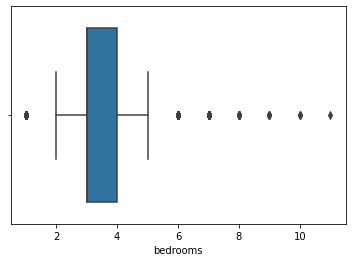

In [79]:
sns.boxplot(x=df['bedrooms'])

In [80]:
# defining the first and the third quartile
q3 = df['bedrooms'].quantile(.75)
q1 = df['bedrooms'].quantile(.25)

# calculating the interquartile range
iqr = q3 - q1

# calculating the median
median = df['bedrooms'].median()

# defining the upper limit of the data according to the 1.5*IQR rule
outlier_limit_upper = median + 1.5*iqr

# defining the lower limit of the data according to the 1.5*IQR rule
outlier_limit_lower = median - 1.5*iqr


# return only those rows, where the value of `IC2` is not an "upper" outlier
dfclean1 = df[df['bedrooms'] < outlier_limit_upper]

dfclean1

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price
6729,4,1.75,1.0,0,0,4,8,1160,1,1947,0,2590,21891,647500
8404,3,1.00,1.0,0,0,3,7,1460,0,1952,0,2250,20023,400000
8800,3,1.00,1.5,0,0,4,6,1010,1,1930,0,1290,10320,235000
3553,4,2.00,1.0,0,0,3,7,760,1,1951,1,1480,3504,402500
18506,4,2.75,1.0,0,0,5,7,1170,1,1951,0,1540,4200,680000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11642,3,1.00,1.0,0,0,4,7,1310,0,1964,0,1120,4166,415885
3257,2,1.00,1.0,0,0,5,7,840,1,1939,0,1930,5150,380000
7614,3,1.00,1.0,0,0,4,7,720,1,1942,0,1510,4538,339000
20963,2,1.75,1.5,0,0,3,9,900,1,2011,0,1440,1188,399900


This removed just under 2000 entries. 

#### boxplot bedrooms after

<AxesSubplot:xlabel='bedrooms'>

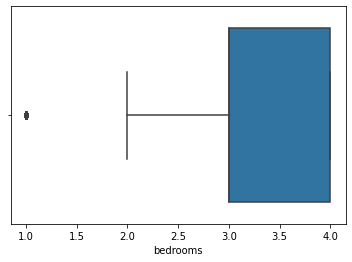

In [81]:
sns.boxplot(x=dfclean1['bedrooms'])

#### Bathrooms

To remove outliers here I will remove any that are outside the 1.5* IQR

##### Boxplot before bathrooms

<AxesSubplot:xlabel='bathrooms'>

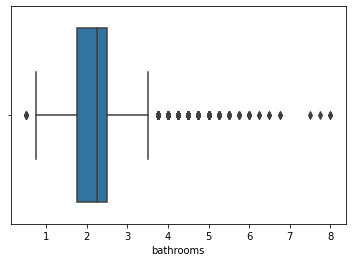

In [82]:
sns.boxplot(x=df['bathrooms'])

In [83]:
# defining the first and the third quartile
q3 = dfclean1['bathrooms'].quantile(.75)
q1 = dfclean1['bathrooms'].quantile(.25)

# calculating the interquartile range
iqr = q3 - q1

# calculating the median
median = dfclean1['bathrooms'].median()

# defining the upper limit of the data according to the 1.5*IQR rule
outlier_limit_upper = median + 1.5*iqr

# defining the lower limit of the data according to the 1.5*IQR rule
outlier_limit_lower = median - 1.5*iqr


# return only those rows, where the value of `IC2` is not an "upper" outlier
dfclean1 = dfclean1[dfclean1['bathrooms'] < outlier_limit_upper]

dfclean1

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price
6729,4,1.75,1.0,0,0,4,8,1160,1,1947,0,2590,21891,647500
8404,3,1.00,1.0,0,0,3,7,1460,0,1952,0,2250,20023,400000
8800,3,1.00,1.5,0,0,4,6,1010,1,1930,0,1290,10320,235000
3553,4,2.00,1.0,0,0,3,7,760,1,1951,1,1480,3504,402500
18506,4,2.75,1.0,0,0,5,7,1170,1,1951,0,1540,4200,680000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11642,3,1.00,1.0,0,0,4,7,1310,0,1964,0,1120,4166,415885
3257,2,1.00,1.0,0,0,5,7,840,1,1939,0,1930,5150,380000
7614,3,1.00,1.0,0,0,4,7,720,1,1942,0,1510,4538,339000
20963,2,1.75,1.5,0,0,3,9,900,1,2011,0,1440,1188,399900


This removed a further approx 800 rows

#### boxplot bathrooms after

<AxesSubplot:xlabel='bathrooms'>

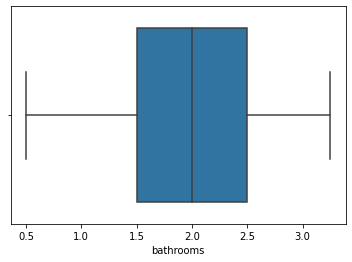

In [84]:
sns.boxplot(x=dfclean1['bathrooms'])

#### Floors

To remove outliers here I will remove any that are outside the 1.5* IQR

##### Boxplot before floors

<AxesSubplot:xlabel='floors'>

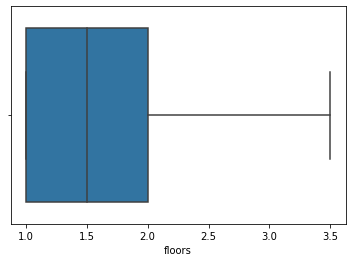

In [85]:
sns.boxplot(x=df['floors'])

In [86]:
# defining the first and the third quartile
q3 = dfclean1['floors'].quantile(.75)
q1 = dfclean1['floors'].quantile(.25)

# calculating the interquartile range
iqr = q3 - q1

# calculating the median
median = dfclean1['floors'].median()

# defining the upper limit of the data according to the 1.5*IQR rule
outlier_limit_upper = median + 1.5*iqr

# defining the lower limit of the data according to the 1.5*IQR rule
outlier_limit_lower = median - 1.5*iqr


# return only those rows, where the value of `IC2` is not an "upper" outlier
dfclean1 = dfclean1[dfclean1['floors'] < outlier_limit_upper]

dfclean1

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price
6729,4,1.75,1.0,0,0,4,8,1160,1,1947,0,2590,21891,647500
8404,3,1.00,1.0,0,0,3,7,1460,0,1952,0,2250,20023,400000
8800,3,1.00,1.5,0,0,4,6,1010,1,1930,0,1290,10320,235000
3553,4,2.00,1.0,0,0,3,7,760,1,1951,1,1480,3504,402500
18506,4,2.75,1.0,0,0,5,7,1170,1,1951,0,1540,4200,680000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11642,3,1.00,1.0,0,0,4,7,1310,0,1964,0,1120,4166,415885
3257,2,1.00,1.0,0,0,5,7,840,1,1939,0,1930,5150,380000
7614,3,1.00,1.0,0,0,4,7,720,1,1942,0,1510,4538,339000
20963,2,1.75,1.5,0,0,3,9,900,1,2011,0,1440,1188,399900


Here another 650 rows were removed. 

#### boxplot floors after

<AxesSubplot:xlabel='floors'>

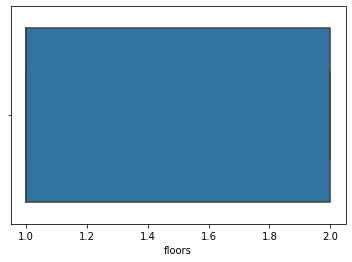

In [87]:
sns.boxplot(x=dfclean1['floors'])

### In total approx 3,552 rows out of 21,597 original rows were removed after cleaning (16.5%) 

# ***ITERATION 2, TEST 1***: 
no more cleaning or removal, max columns. 

In [88]:
X=dfclean1.drop('price', axis=1)
y=dfclean1.price

In [89]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test=tts(X, y, test_size=.25, random_state = 42)

In [90]:
import warnings
warnings.simplefilter('ignore')

import statsmodels.api as sm
from statsmodels.formula.api import ols

X_train_wi=sm.add_constant(X_train)
model=sm.OLS(y_train,X_train_wi).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     1579.
Date:                Thu, 19 Nov 2020   Prob (F-statistic):               0.00
Time:                        14:14:52   Log-Likelihood:            -1.8233e+05
No. Observations:               13533   AIC:                         3.647e+05
Df Residuals:                   13519   BIC:                         3.648e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.528e+06   1.44e+05     38.369

# LINEAR REGRESSION

In [91]:
from sklearn.linear_model import LinearRegression as LinReg

linreg=LinReg()    # model
linreg.fit(X_train, y_train)   # model train
y_pred_linreg=linreg.predict(X_test)

# R2

In [92]:
print ('train R2: {} -- test R2: {}'.format(linreg.score(X_train, y_train),
                                            linreg.score(X_test, y_test)))

train R2: 0.6029603780525361 -- test R2: 0.6047180119746829


# MSE

In [93]:
from sklearn.metrics import mean_squared_error as mse


train_mse=mse(linreg.predict(X_train), y_train)
test_mse=mse(linreg.predict(X_test), y_test)

print ('train MSE: {} -- test MSE: {}'.format(train_mse, test_mse))

train MSE: 29500606756.520878 -- test MSE: 29613359241.71381


# OTHER MODELS

In [94]:
# sklearn
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split


In [95]:
def models_automation(models, X_train, y_train):
    for model in models:
        model.fit(X_train, y_train)
        print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

linear_models = [LinearRegression(), Lasso(), Ridge(), ElasticNet()]
models_automation(linear_models, X_train, y_train)

LinearRegression: Train -> 0.6029603780525361, Test -> 0.6047180119746829
Lasso: Train -> 0.6029603753984156, Test -> 0.6047180068181127
Ridge: Train -> 0.6029576286097669, Test -> 0.6046790645367945
ElasticNet: Train -> 0.5332793610629147, Test -> 0.5343998721754029


In [96]:
from sklearn.svm import SVR
svr = [SVR()]
models_automation(svr, X_train, y_train)

SVR: Train -> -0.049883748406035044, Test -> -0.06676317501812568


In [97]:
from sklearn.neighbors import KNeighborsRegressor
knn = [KNeighborsRegressor()]
models_automation(knn, X_train, y_train)

KNeighborsRegressor: Train -> 0.586949285339154, Test -> 0.3778109933092244


In [98]:
from sklearn.tree import DecisionTreeRegressor
dtr = [DecisionTreeRegressor()]
models_automation(dtr, X_train, y_train)

DecisionTreeRegressor: Train -> 0.9999653804445698, Test -> 0.35953341985827936


In [99]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
rfr = [GradientBoostingRegressor(), RandomForestRegressor()]
models_automation(rfr, X_train, y_train)

GradientBoostingRegressor: Train -> 0.7317223208743335, Test -> 0.6770026948491732
RandomForestRegressor: Train -> 0.9556012396654319, Test -> 0.6851563826249478


# RESULTS ITERATION 2, TEST 1: 
60% prediction rate from linear regression. Pretty good, but not as good as the less cleaned data. 
All other types of analysis were also worse than in Iteration 1, Test 1, except for the MSE, which was signifcantly less. 

# ***ITERATION 2, TEST 2***:  
Only those with a correlation of 0.45 or higher with price are kept. 

In [100]:
df2_2 = dfclean1.drop(['bedrooms','floors', 'waterfront', 'view', 'condition', 'sqft_basement', 'yr_built', 'yr_renovated', 
                 'sqft_lot15'], axis=1, inplace=False)

In [101]:
df2_2

,bathrooms,grade,sqft_above,sqft_living15,price
6729,1.75,8,1160,2590,647500
8404,1.00,7,1460,2250,400000
8800,1.00,6,1010,1290,235000
3553,2.00,7,760,1480,402500
18506,2.75,7,1170,1540,680000
...,...,...,...,...,...
11642,1.00,7,1310,1120,415885
3257,1.00,7,840,1930,380000
7614,1.00,7,720,1510,339000
20963,1.75,9,900,1440,399900


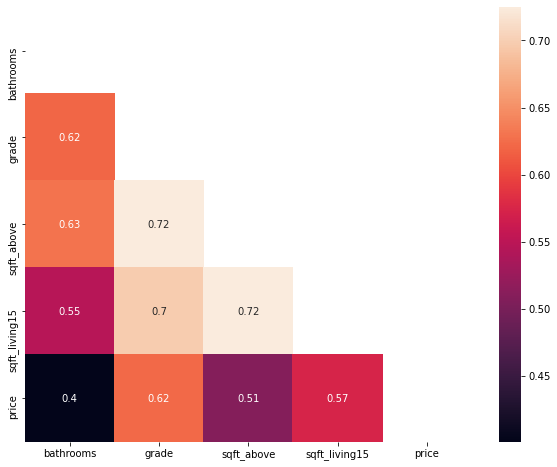

In [102]:
mask=np.zeros_like(df2_2.corr())
mask[np.triu_indices_from(mask)]=True
fig, ax=plt.subplots(figsize=(10, 8))
ax=sns.heatmap(df2_2.corr(), mask=mask, annot=True, fmt='.2g')
plt.show()

# NB: correlations are slightly less than in Iteration 1, Test 2

In [103]:
X=df2_2.drop('price', axis=1)
y=df2_2.price

In [104]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test=tts(X, y, test_size=.25, random_state = 42)

In [105]:
import warnings
warnings.simplefilter('ignore')

import statsmodels.api as sm
from statsmodels.formula.api import ols

X_train_wi=sm.add_constant(X_train)
model=sm.OLS(y_train,X_train_wi).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     2461.
Date:                Thu, 19 Nov 2020   Prob (F-statistic):               0.00
Time:                        14:15:22   Log-Likelihood:            -1.8488e+05
No. Observations:               13533   AIC:                         3.698e+05
Df Residuals:                   13528   BIC:                         3.698e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.849e+05   1.48e+04    -39.604

In [106]:
from sklearn.linear_model import LinearRegression as LinReg

linreg=LinReg()    # model
linreg.fit(X_train, y_train)   # model train
y_pred_linreg=linreg.predict(X_test)

# R2

In [107]:
print ('train R2: {} -- test R2: {}'.format(linreg.score(X_train, y_train),
                                            linreg.score(X_test, y_test)))

train R2: 0.42116127915294 -- test R2: 0.43882408105546544


# MSE

In [108]:
from sklearn.metrics import mean_squared_error as mse


train_mse=mse(linreg.predict(X_train), y_train)
test_mse=mse(linreg.predict(X_test), y_test)

print ('train MSE: {} -- test MSE: {}'.format(train_mse, test_mse))

train MSE: 43008537524.28814 -- test MSE: 42041642647.37253


# OTHER MODELS 

In [109]:
# sklearn
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split


In [110]:
def models_automation(models, X_train, y_train):
    for model in models:
        model.fit(X_train, y_train)
        print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

linear_models = [LinearRegression(), Lasso(), Ridge(), ElasticNet()]
models_automation(linear_models, X_train, y_train)

LinearRegression: Train -> 0.42116127915294, Test -> 0.43882408105546544
Lasso: Train -> 0.42116127903621114, Test -> 0.4388241649036895
Ridge: Train -> 0.4211612766100039, Test -> 0.43882431227716334
ElasticNet: Train -> 0.3994393678765211, Test -> 0.41660229735879706


In [111]:
from sklearn.svm import SVR
svr = [SVR()]
models_automation(svr, X_train, y_train)

SVR: Train -> -0.04495080905123161, Test -> -0.06141254702851584


In [112]:
from sklearn.neighbors import KNeighborsRegressor
knn = [KNeighborsRegressor()]
models_automation(knn, X_train, y_train)

KNeighborsRegressor: Train -> 0.5327754697821226, Test -> 0.2900985932635982


In [113]:
from sklearn.tree import DecisionTreeRegressor
dtr = [DecisionTreeRegressor()]
models_automation(dtr, X_train, y_train)

DecisionTreeRegressor: Train -> 0.9875026996304571, Test -> 0.015876823181427135


In [114]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
rfr = [GradientBoostingRegressor(), RandomForestRegressor()]
models_automation(rfr, X_train, y_train)

GradientBoostingRegressor: Train -> 0.5508333627927489, Test -> 0.49862952088035883
RandomForestRegressor: Train -> 0.9118773819986451, Test -> 0.42577940531068137


# RESULTS ITERATION 2, TEST 2: 
Removing some of the columns led to lower accuracy by about 0.05 compared to Test 1 in linear regression and more in other models. The MSE was, however better than in Iteration 1, Test 2. 
Further nuancing could be done here to find the exact ones, but time is an issue. 

# ***ITERATION 2, TEST 3***:  
Only those with a correlation of 0.45 or higher and have less than 0.75 with other columns are kept. 
This means that ALL columns except Grade will be removed. 

In [115]:
df2_3 = df2_2.drop(['bathrooms','sqft_above', 'sqft_living15'], axis=1, inplace=False)

In [116]:
df2_3

,grade,price
6729,8,647500
8404,7,400000
8800,6,235000
3553,7,402500
18506,7,680000
...,...,...
11642,7,415885
3257,7,380000
7614,7,339000
20963,9,399900


In [117]:
X=df2_3.drop('price', axis=1)
y=df2_3.price

In [118]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test=tts(X, y, test_size=.25, random_state = 42)

In [119]:
import warnings
warnings.simplefilter('ignore')

import statsmodels.api as sm
from statsmodels.formula.api import ols

X_train_wi=sm.add_constant(X_train)
model=sm.OLS(y_train,X_train_wi).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     8467.
Date:                Thu, 19 Nov 2020   Prob (F-statistic):               0.00
Time:                        14:15:41   Log-Likelihood:            -1.8529e+05
No. Observations:               13533   AIC:                         3.706e+05
Df Residuals:                   13531   BIC:                         3.706e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.181e+05   1.32e+04    -54.342      0.0

In [120]:
from sklearn.linear_model import LinearRegression as LinReg

linreg=LinReg()    # model
linreg.fit(X_train, y_train)   # model train
y_pred_linreg=linreg.predict(X_test)

# R2

In [121]:
print ('train R2: {} -- test R2: {}'.format(linreg.score(X_train, y_train),
                                            linreg.score(X_test, y_test)))

train R2: 0.38488657282308847 -- test R2: 0.3957770720988366


# MSE

In [122]:
from sklearn.metrics import mean_squared_error as mse


train_mse=mse(linreg.predict(X_train), y_train)
test_mse=mse(linreg.predict(X_test), y_test)

print ('train MSE: {} -- test MSE: {}'.format(train_mse, test_mse))

train MSE: 45703799627.844215 -- test MSE: 45266597436.94487


# OTHER MODELS 

In [123]:
# sklearn
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split


In [124]:
def models_automation(models, X_train, y_train):
    for model in models:
        model.fit(X_train, y_train)
        print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

linear_models = [LinearRegression(), Lasso(), Ridge(), ElasticNet()]
models_automation(linear_models, X_train, y_train)

LinearRegression: Train -> 0.38488657282308847, Test -> 0.3957770720988366
Lasso: Train -> 0.3848865728109352, Test -> 0.3957770910701105
Ridge: Train -> 0.38488657110966285, Test -> 0.3957772957257045
ElasticNet: Train -> 0.34764554097562705, Test -> 0.3580808988922177


In [125]:
from sklearn.svm import SVR
svr = [SVR()]
models_automation(svr, X_train, y_train)

SVR: Train -> -0.043455764585754286, Test -> -0.0599423616841539


In [126]:
from sklearn.neighbors import KNeighborsRegressor
knn = [KNeighborsRegressor()]
models_automation(knn, X_train, y_train)

KNeighborsRegressor: Train -> 0.30383744644165167, Test -> 0.2903308658768776


In [127]:
from sklearn.tree import DecisionTreeRegressor
dtr = [DecisionTreeRegressor()]
models_automation(dtr, X_train, y_train)

DecisionTreeRegressor: Train -> 0.4262022969031377, Test -> 0.4144772738973066


In [128]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
rfr = [GradientBoostingRegressor(), RandomForestRegressor()]
models_automation(rfr, X_train, y_train)

GradientBoostingRegressor: Train -> 0.42620229570174617, Test -> 0.4144799675999983
RandomForestRegressor: Train -> 0.42619445310765514, Test -> 0.41475351560028184


# RESULTS ITERATION 2, TEST 3: 
Considering that we are only working with 1 column, I would say that the results are not too bad, particularly when compared to the few more columns used above in Test 2. Nonetheless a reduction to less than 40% prediction probability is quite bad.

# ITERATION 3
NORMALISATION  / STANDARDISATION

# ***ITERATION 3, TEST 1***: 
Normalisation, but max columns. 

In [129]:
X=df.drop('price', axis=1)
y=df.price

#### Histograms before normalisation

In [130]:
def df_hist(df):
    sns.set(rc={'figure.figsize':(16,8)})
    for i, col in enumerate(df):
        plt.figure(i)
        sns.distplot(df[col], color = list(BASE_COLORS.keys())[3])
        
    plt.show()

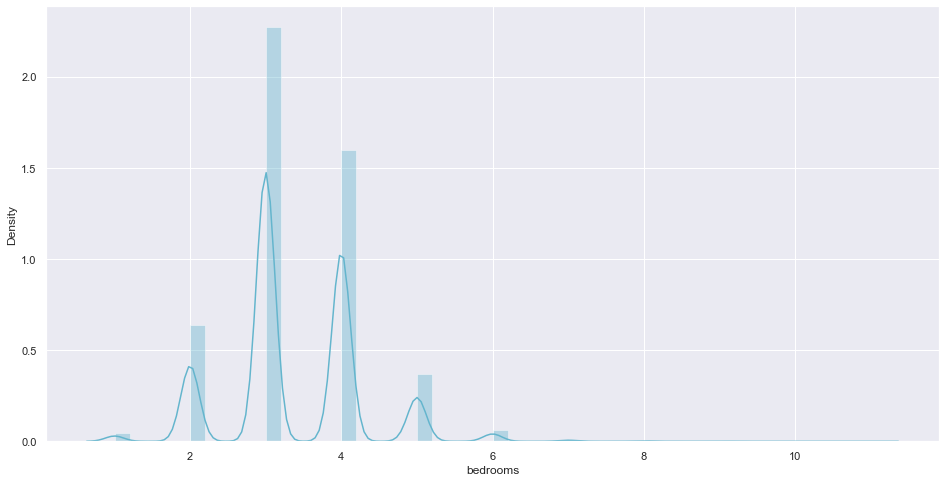

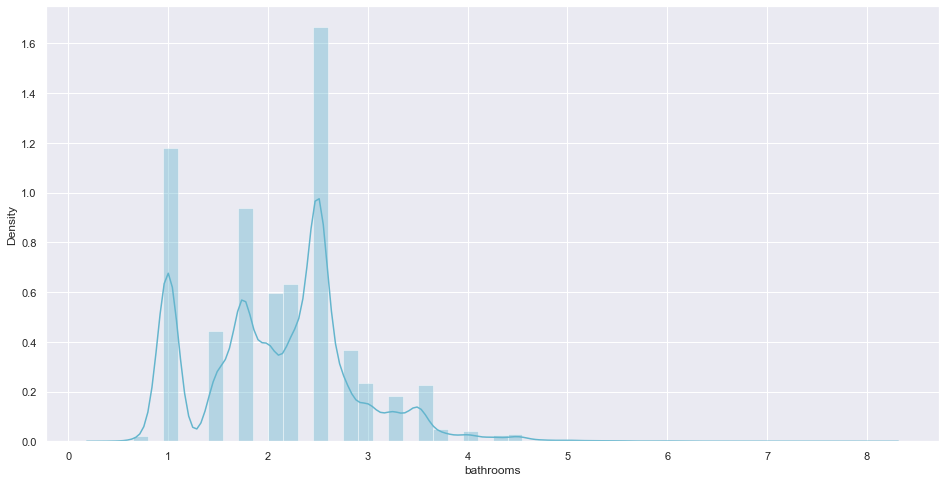

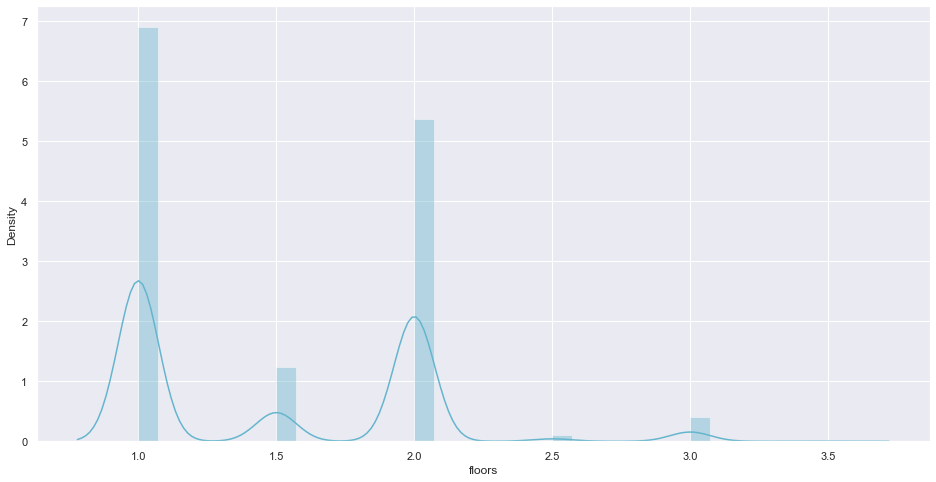

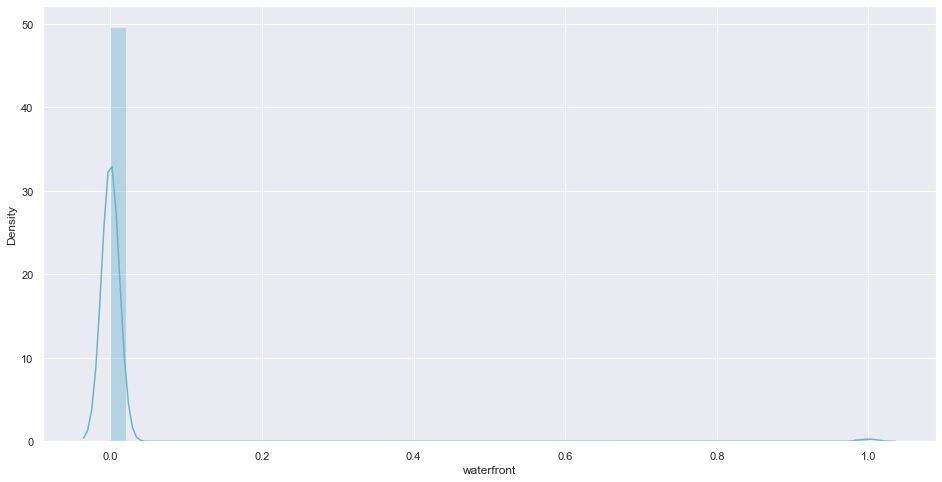

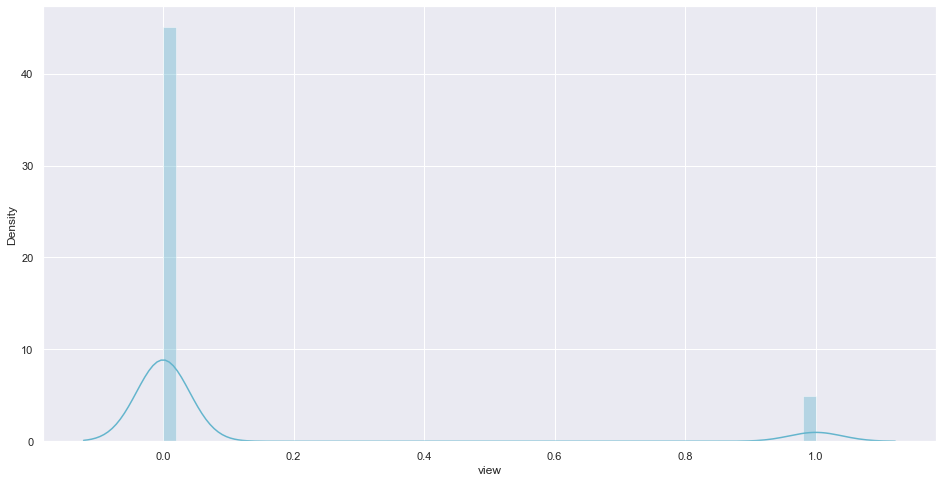

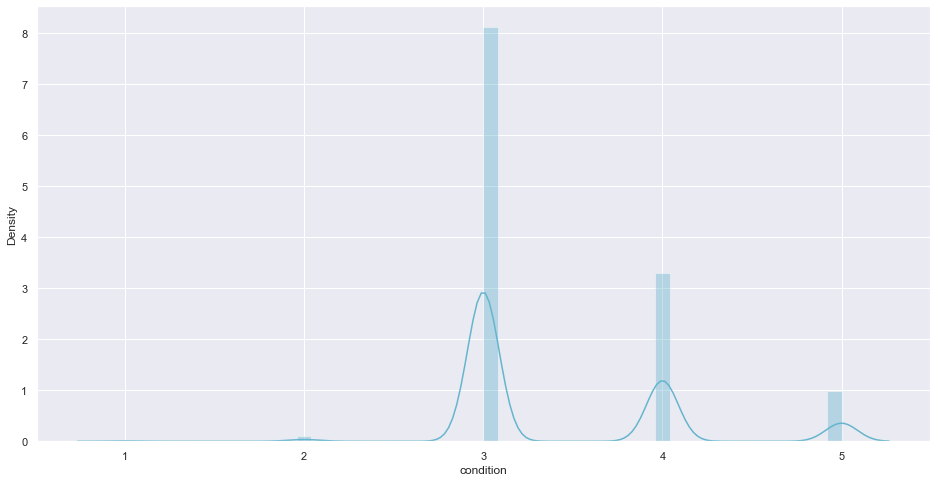

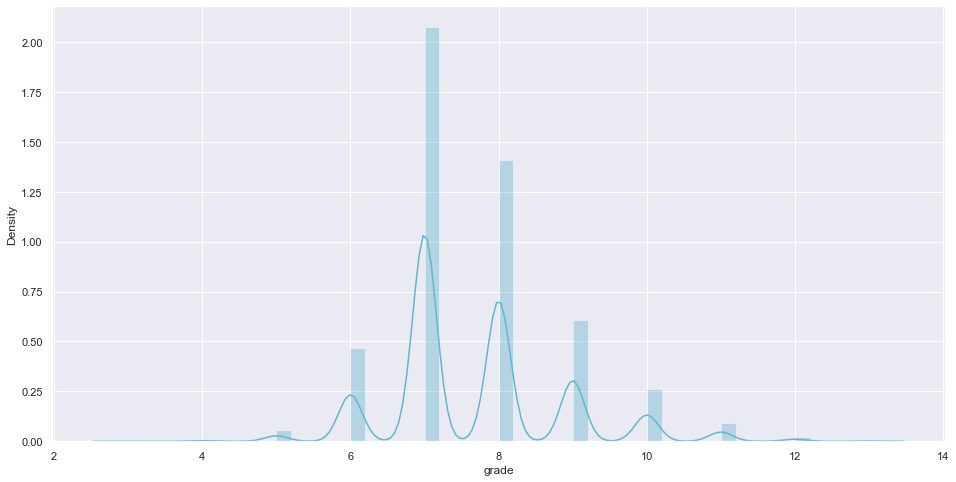

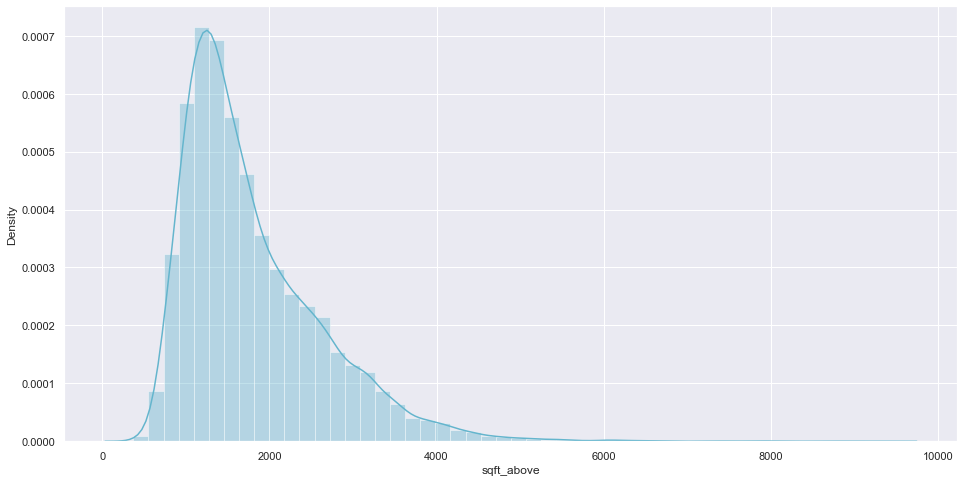

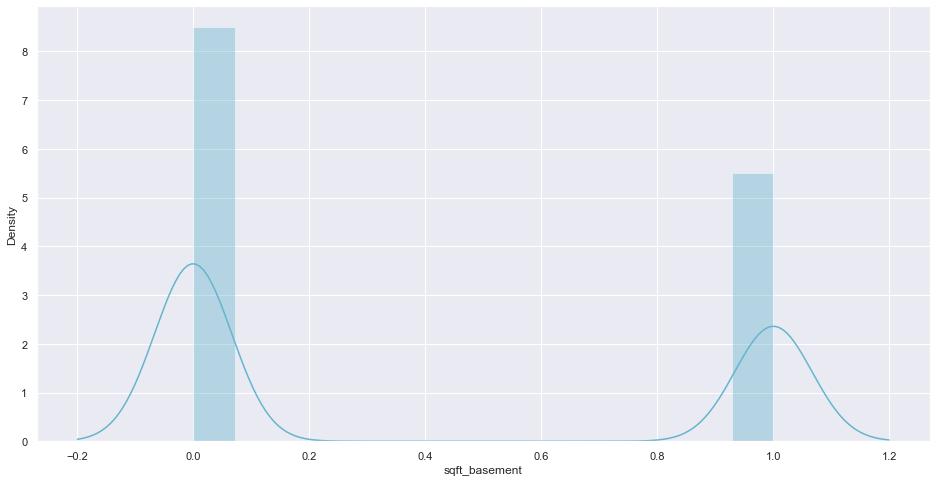

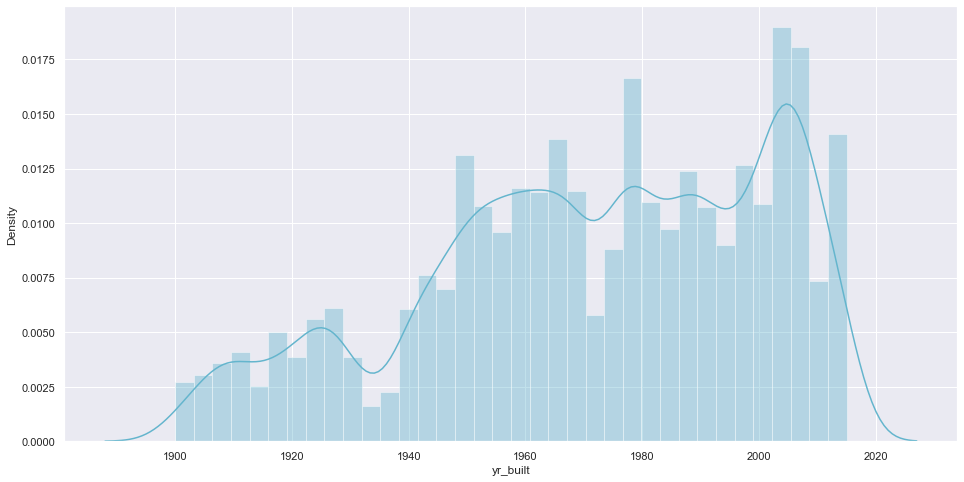

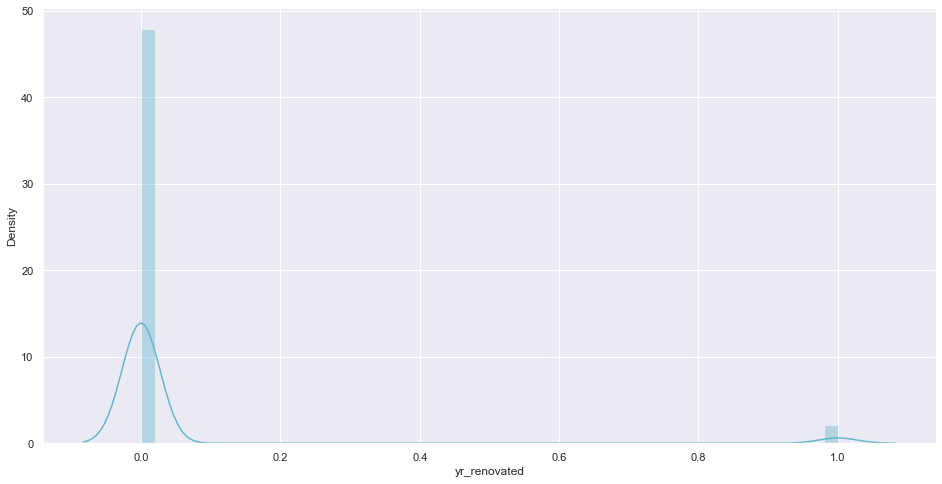

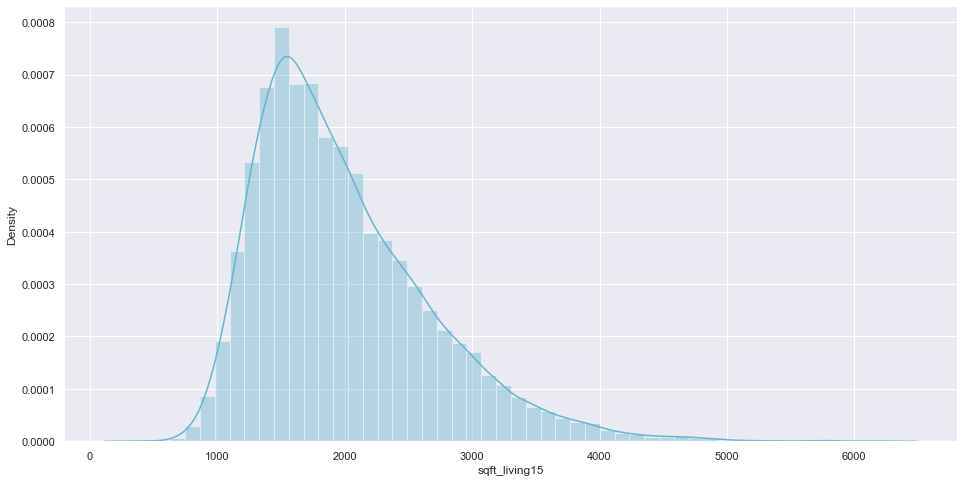

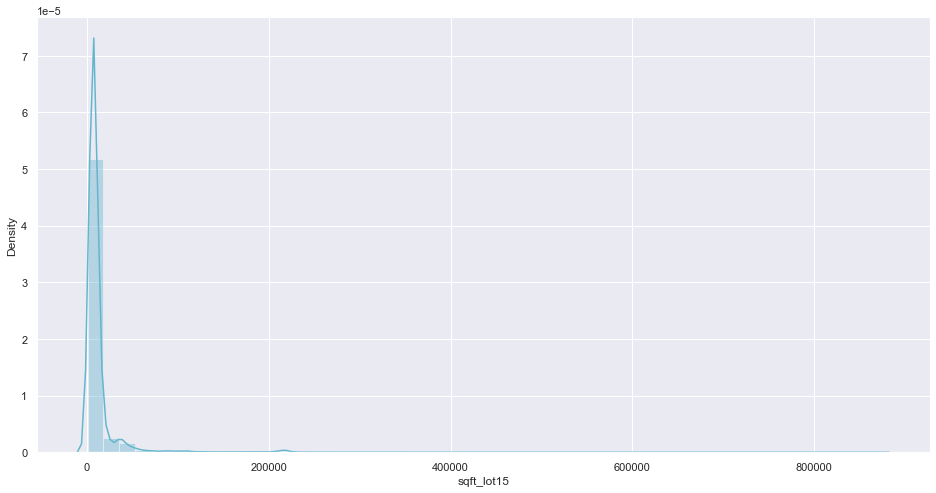

In [131]:
df_hist(X)

In [132]:
from sklearn.preprocessing import StandardScaler

X=StandardScaler().fit_transform(X)


In [133]:
X

array([[ 2.90977447,  1.14683056,  0.93324277, ..., -0.21063855,
         0.10446932, -0.19966069],
       [ 0.69487152, -0.4792872 , -0.91837451, ..., -0.21063855,
         0.87760385,  0.33334384],
       [-0.41257996, -1.45495786, -0.91837451, ..., -0.21063855,
         0.38163076,  0.26503149],
       ...,
       [-0.41257996, -1.45495786, -0.91837451, ..., -0.21063855,
        -0.6978401 , -0.30125153],
       [-1.52003144, -0.4792872 ,  0.00743413, ..., -0.21063855,
        -0.79995221, -0.42376029],
       [-0.41257996, -1.45495786, -0.91837451, ..., -0.21063855,
        -1.44179974, -0.17098998]])

In [134]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test=tts(X, y, test_size=.25, random_state = 42)

In [135]:
import warnings
warnings.simplefilter('ignore')

import statsmodels.api as sm
from statsmodels.formula.api import ols

X_train_wi=sm.add_constant(X_train)
model=sm.OLS(y_train,X_train_wi).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     2248.
Date:                Thu, 19 Nov 2020   Prob (F-statistic):               0.00
Time:                        14:16:04   Log-Likelihood:            -2.2034e+05
No. Observations:               16065   AIC:                         4.407e+05
Df Residuals:                   16051   BIC:                         4.408e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.417e+05   1728.330    313.452      0.0

# LINEAR REGRESSION

In [136]:
from sklearn.linear_model import LinearRegression as LinReg

linreg=LinReg()    # model
linreg.fit(X_train, y_train)   # model train
y_pred_linreg=linreg.predict(X_test)

# R2

In [137]:
print ('train R2: {} -- test R2: {}'.format(linreg.score(X_train, y_train),
                                            linreg.score(X_test, y_test)))

train R2: 0.6454741333301519 -- test R2: 0.6346134977866


# MSE

In [138]:
from sklearn.metrics import mean_squared_error as mse


train_mse=mse(linreg.predict(X_train), y_train)
test_mse=mse(linreg.predict(X_test), y_test)

print ('train MSE: {} -- test MSE: {}'.format(train_mse, test_mse))

train MSE: 47927484168.759476 -- test MSE: 49254766631.12363


# OTHER MODELS

In [139]:
# sklearn
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split


In [140]:
def models_automation(models, X_train, y_train):
    for model in models:
        model.fit(X_train, y_train)
        print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

linear_models = [LinearRegression(), Lasso(), Ridge(), ElasticNet()]
models_automation(linear_models, X_train, y_train)

LinearRegression: Train -> 0.6454741333301519, Test -> 0.6346134977866
Lasso: Train -> 0.6454741332178742, Test -> 0.6346139808940314
Ridge: Train -> 0.6454741299908656, Test -> 0.634615584241437
ElasticNet: Train -> 0.6008475929499371, Test -> 0.5988604033009561


In [141]:
from sklearn.svm import SVR
svr = [SVR()]
models_automation(svr, X_train, y_train)

SVR: Train -> -0.05780616002109151, Test -> -0.06051307684984719


In [142]:
from sklearn.neighbors import KNeighborsRegressor
knn = [KNeighborsRegressor()]
models_automation(knn, X_train, y_train)

KNeighborsRegressor: Train -> 0.796719918304883, Test -> 0.6761397148308453


In [143]:
from sklearn.tree import DecisionTreeRegressor
dtr = [DecisionTreeRegressor()]
models_automation(dtr, X_train, y_train)

DecisionTreeRegressor: Train -> 0.9999883194893056, Test -> 0.49474504930583063


In [144]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
rfr = [GradientBoostingRegressor(), RandomForestRegressor()]
models_automation(rfr, X_train, y_train)

GradientBoostingRegressor: Train -> 0.7968084512599025, Test -> 0.7330470556688752
RandomForestRegressor: Train -> 0.9631182904575367, Test -> 0.7287946823242496


# RESULTS ITERATION 3, TEST 1: 
Results are almost identical to iteration 1, Test 1. KNN seems a lot better (0.67 v 0.45) than in 1.1, however. Would be interesting to explore more as to why. 

# ***ITERATION 3, TEST 2***:  
Only those with a correlation of 0.45 or higher with price are kept and then normalisation will be done. 

In [145]:
df3_2 = df.drop(['bedrooms','floors', 'waterfront', 'view', 'condition', 'sqft_basement', 'yr_built', 'yr_renovated', 
                 'sqft_lot15'], axis=1, inplace=False)

In [146]:
df3_2

,bathrooms,grade,sqft_above,sqft_living15,price
2495,3.00,7,2400,2060,300000
6729,1.75,8,1160,2590,647500
8404,1.00,7,1460,2250,400000
8800,1.00,6,1010,1290,235000
3553,2.00,7,760,1480,402500
...,...,...,...,...,...
16723,2.00,7,1600,1190,365000
3257,1.00,7,840,1930,380000
7614,1.00,7,720,1510,339000
20963,1.75,9,900,1440,399900


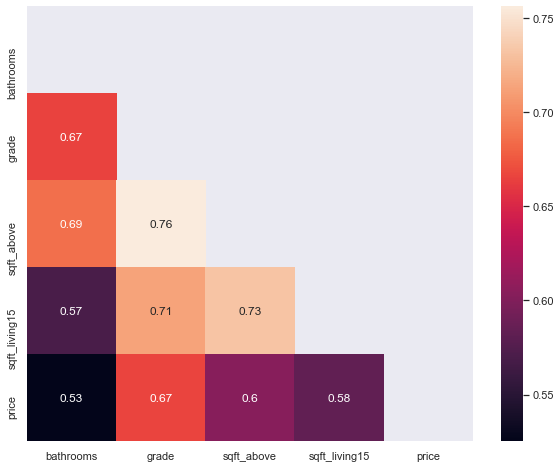

In [182]:
mask=np.zeros_like(df3_2.corr())
mask[np.triu_indices_from(mask)]=True
fig, ax=plt.subplots(figsize=(10, 8))
ax=sns.heatmap(df3_2.corr(), mask=mask, annot=True, fmt='.2g')
plt.show()

In [148]:
X=df3_2.drop('price', axis=1)
y=df3_2.price

In [149]:
from sklearn.preprocessing import StandardScaler

X=StandardScaler().fit_transform(X)


In [150]:
X

array([[ 1.14683056, -0.56554914,  0.73470395,  0.10446932],
       [-0.4792872 ,  0.28773413, -0.76166322,  0.87760385],
       [-1.45495786, -0.56554914, -0.3996389 ,  0.38163076],
       ...,
       [-1.45495786, -0.56554914, -1.29263221, -0.6978401 ],
       [-0.4792872 ,  1.14101741, -1.07541762, -0.79995221],
       [-1.45495786, -1.41883242, -1.09955258, -1.44179974]])

In [151]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test=tts(X, y, test_size=.25, random_state = 42)

In [152]:
import warnings
warnings.simplefilter('ignore')

import statsmodels.api as sm
from statsmodels.formula.api import ols

X_train_wi=sm.add_constant(X_train)
model=sm.OLS(y_train,X_train_wi).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     3699.
Date:                Thu, 19 Nov 2020   Prob (F-statistic):               0.00
Time:                        14:16:44   Log-Likelihood:            -2.2342e+05
No. Observations:               16065   AIC:                         4.469e+05
Df Residuals:                   16060   BIC:                         4.469e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.406e+05   2093.216    258.242      0.0

In [153]:
from sklearn.linear_model import LinearRegression as LinReg

linreg=LinReg()    # model
linreg.fit(X_train, y_train)   # model train
y_pred_linreg=linreg.predict(X_test)

# R2

In [154]:
print ('train R2: {} -- test R2: {}'.format(linreg.score(X_train, y_train),
                                            linreg.score(X_test, y_test)))

train R2: 0.479514329513412 -- test R2: 0.48430659958681777


# MSE

In [155]:
from sklearn.metrics import mean_squared_error as mse


train_mse=mse(linreg.predict(X_train), y_train)
test_mse=mse(linreg.predict(X_test), y_test)

print ('train MSE: {} -- test MSE: {}'.format(train_mse, test_mse))

train MSE: 70363183839.39711 -- test MSE: 69516410531.57208


# OTHER MODELS 

In [156]:
# sklearn
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split


In [157]:
def models_automation(models, X_train, y_train):
    for model in models:
        model.fit(X_train, y_train)
        print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

linear_models = [LinearRegression(), Lasso(), Ridge(), ElasticNet()]
models_automation(linear_models, X_train, y_train)

LinearRegression: Train -> 0.479514329513412, Test -> 0.48430659958681777
Lasso: Train -> 0.47951432946495365, Test -> 0.4843064704372504
Ridge: Train -> 0.4795143284285244, Test -> 0.48430675683462443
ElasticNet: Train -> 0.46340220501661367, Test -> 0.46751751585171253


In [158]:
from sklearn.svm import SVR
svr = [SVR()]
models_automation(svr, X_train, y_train)

SVR: Train -> -0.056051490421093364, Test -> -0.058725572351489896


In [159]:
from sklearn.neighbors import KNeighborsRegressor
knn = [KNeighborsRegressor()]
models_automation(knn, X_train, y_train)

KNeighborsRegressor: Train -> 0.6843702275612713, Test -> 0.5488847050928519


In [160]:
from sklearn.tree import DecisionTreeRegressor
dtr = [DecisionTreeRegressor()]
models_automation(dtr, X_train, y_train)

DecisionTreeRegressor: Train -> 0.9934607822723929, Test -> 0.2651754088979259


In [161]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
rfr = [GradientBoostingRegressor(), RandomForestRegressor()]
models_automation(rfr, X_train, y_train)

GradientBoostingRegressor: Train -> 0.6528442423263516, Test -> 0.5940232653672846
RandomForestRegressor: Train -> 0.9291944018913889, Test -> 0.5479817360270831


# RESULTS ITERATION 3, TEST 2: 
Similar to 3.2, identical in almost every way to 1.2, except again for the KNN. 
Much much better at 0.55 v 0.29. 

# ***ITERATION 3, TEST 3***:  
Only those with a correlation of 0.45 or higher and have less than 0.75 with other columns are kept then normalisation will be done. 
This means that ALL columns except Grade will be removed. 

In [162]:
df3_3 = df3_2.drop(['bathrooms','sqft_above', 'sqft_living15'], axis=1, inplace=False)

In [163]:
df3_3

,grade,price
2495,7,300000
6729,8,647500
8404,7,400000
8800,6,235000
3553,7,402500
...,...,...
16723,7,365000
3257,7,380000
7614,7,339000
20963,9,399900


In [164]:
X=df3_3.drop('price', axis=1)
y=df3_3.price

In [165]:
from sklearn.preprocessing import StandardScaler

X=StandardScaler().fit_transform(X)


In [166]:
X

array([[-0.56554914],
       [ 0.28773413],
       [-0.56554914],
       ...,
       [-0.56554914],
       [ 1.14101741],
       [-1.41883242]])

In [167]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test=tts(X, y, test_size=.25, random_state = 42)

In [168]:
import warnings
warnings.simplefilter('ignore')

import statsmodels.api as sm
from statsmodels.formula.api import ols

X_train_wi=sm.add_constant(X_train)
model=sm.OLS(y_train,X_train_wi).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                 1.284e+04
Date:                Thu, 19 Nov 2020   Prob (F-statistic):               0.00
Time:                        14:17:10   Log-Likelihood:            -2.2395e+05
No. Observations:               16065   AIC:                         4.479e+05
Df Residuals:                   16063   BIC:                         4.479e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.409e+05   2162.545    250.141      0.0

In [169]:
from sklearn.linear_model import LinearRegression as LinReg

linreg=LinReg()    # model
linreg.fit(X_train, y_train)   # model train
y_pred_linreg=linreg.predict(X_test)

# R2

In [170]:
print ('train R2: {} -- test R2: {}'.format(linreg.score(X_train, y_train),
                                            linreg.score(X_test, y_test)))

train R2: 0.4443273635440379 -- test R2: 0.4456582629115996


# MSE

In [171]:
from sklearn.metrics import mean_squared_error as mse


train_mse=mse(linreg.predict(X_train), y_train)
test_mse=mse(linreg.predict(X_test), y_test)

print ('train MSE: {} -- test MSE: {}'.format(train_mse, test_mse))

train MSE: 75120023644.30289 -- test MSE: 74726276774.8171


# OTHER MODELS 

In [172]:
# sklearn
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split


In [173]:
def models_automation(models, X_train, y_train):
    for model in models:
        model.fit(X_train, y_train)
        print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

linear_models = [LinearRegression(), Lasso(), Ridge(), ElasticNet()]
models_automation(linear_models, X_train, y_train)

LinearRegression: Train -> 0.4443273635440379, Test -> 0.4456582629115996
Lasso: Train -> 0.44432736353665503, Test -> 0.44565824851881364
Ridge: Train -> 0.4443273618292699, Test -> 0.44565804196776604
ElasticNet: Train -> 0.39508462253270615, Test -> 0.3954813244579607


In [174]:
from sklearn.svm import SVR
svr = [SVR()]
models_automation(svr, X_train, y_train)

SVR: Train -> -0.05460750766305278, Test -> -0.05733297415928207


In [175]:
from sklearn.neighbors import KNeighborsRegressor
knn = [KNeighborsRegressor()]
models_automation(knn, X_train, y_train)

KNeighborsRegressor: Train -> 0.27395818498780966, Test -> 0.3065024278762103


In [176]:
from sklearn.tree import DecisionTreeRegressor
dtr = [DecisionTreeRegressor()]
models_automation(dtr, X_train, y_train)

DecisionTreeRegressor: Train -> 0.5174115307191618, Test -> 0.5239908684484536


In [177]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
rfr = [GradientBoostingRegressor(), RandomForestRegressor()]
models_automation(rfr, X_train, y_train)

GradientBoostingRegressor: Train -> 0.5174115286143539, Test -> 0.523988822976615
RandomForestRegressor: Train -> 0.5173708694888377, Test -> 0.5233513499155212


# RESULTS ITERATION 3, TEST 3: 
Exactly the same conclusion as the previous 2 tests: pretty much identical to iteration 1, test 3.
I think scaling was useful to standardise certain things, but in terms of the end result there was little impact. 
Unlike 3.1 and 3.2, however, the KNN was only marginally better than in 1.3, at 0.3 v 0.29 

# CONCLUSIONS

1. MORE DATA IS BETTER
2. CLEANING by eliminating data doesn't seem to be helpful, at least for this dataset. 
3. SCALING cleaned up the organisation of the data, but didn't seem to affect the end results in a substanial way. 
4. Although it only achieved 0.44, Grade is clearly the most influential column in determining the price of a house 


# Trying to check which factors are  responsible for higher price values, i.e. of 650k and above. 

### GOALS

##### List which factors are responsible for higher property values of $650K and above.



First we need to create a subset of the original dataframe, whee only properties greater than or equal to 650k are included


In [178]:
df650 = df[df.price >= 650000]

In [179]:
df650

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price
18506,4,2.75,1.0,0,0,5,7,1170,1,1951,0,1540,4200,680000
11937,3,2.50,2.0,0,0,3,10,2870,0,1991,0,2840,8472,872750
437,3,2.50,2.0,0,0,3,10,3130,0,1991,0,2860,9003,843000
1089,5,2.75,2.0,0,0,3,10,3010,0,1994,0,2890,9456,837700
6875,3,3.25,2.0,0,0,3,10,2460,1,1994,0,2990,9598,715000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14236,4,2.25,2.0,0,0,3,7,1920,1,1980,0,1890,4400,655000
1714,3,1.00,1.5,0,0,4,8,1700,0,1906,0,1610,4180,800000
4675,3,1.50,1.5,0,0,4,7,1490,0,1906,0,1560,4400,670000
4817,3,1.75,1.5,0,0,3,8,1740,0,1903,0,1740,4400,650500


Seems to have worked, we have reduced the amount of entries by over 16,000 or approx 75% of our dataset. 
This implies that only 25% of houses were above $650k. 

In [180]:
df650.corr()

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price
bedrooms,1.000000,0.439651,0.152674,-0.057318,-0.020849,-0.021707,0.204242,0.349928,0.087611,0.089422,-0.016596,0.224648,-0.003272,0.202591
bathrooms,0.439651,1.000000,0.360837,0.050470,0.104271,-0.192619,0.583825,0.636927,0.091093,0.416975,0.044628,0.401366,0.131655,0.466098
floors,0.152674,0.360837,1.000000,0.001139,-0.091422,-0.289511,0.393365,0.517176,-0.332830,0.348225,-0.007813,0.158748,0.031804,0.127331
waterfront,-0.057318,0.050470,0.001139,1.000000,0.280975,0.003565,0.044663,0.027223,0.046774,-0.028946,0.098965,0.051310,0.013494,0.311508
view,-0.020849,0.104271,-0.091422,0.280975,1.000000,0.053934,0.110605,-0.018000,0.277136,-0.097762,0.110455,0.156515,0.002546,0.287157
condition,-0.021707,-0.192619,-0.289511,0.003565,0.053934,1.000000,-0.290030,-0.312809,0.243093,-0.480095,-0.105924,-0.168423,-0.068886,0.002770
grade,0.204242,0.583825,0.393365,0.044663,0.110605,-0.290030,1.000000,0.726372,-0.145773,0.500721,-0.065355,0.618956,0.175391,0.508272
sqft_above,0.349928,0.636927,0.517176,0.027223,-0.018000,-0.312809,0.726372,1.000000,-0.387407,0.503879,-0.070717,0.599761,0.242159,0.466629
sqft_basement,0.087611,0.091093,-0.332830,0.046774,0.277136,0.243093,-0.145773,-0.387407,1.000000,-0.318021,0.111308,-0.120404,-0.109194,0.139528
yr_built,0.089422,0.416975,0.348225,-0.028946,-0.097762,-0.480095,0.500721,0.503879,-0.318021,1.000000,-0.295408,0.368859,0.152570,0.031385


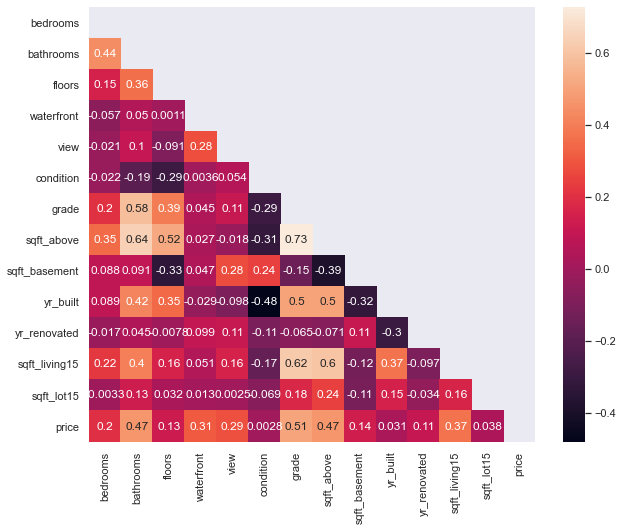

In [181]:
mask=np.zeros_like(df650.corr())
mask[np.triu_indices_from(mask)]=True
fig, ax=plt.subplots(figsize=(10, 8))
ax=sns.heatmap(df650.corr(), mask=mask, annot=True, fmt='.2g')
plt.show()

#### First things noticed

The correlations here are quite a bit less than in the original less filtered data. 
Therefore it would probably be more useful to look at this in Tableau

# THANK YOU FOR MAKING IT TO THE END OF MY FIRST PROPER PROJECT IN JUPYTER NOTEBOOK!!!
# IT IS EPICALLY LONG! CHEERS!